# 데이터 틀 만들기

In [10]:
import pandas as pd
data = pd.read_excel('../data/경기신보/회생 데이터 틀.xlsx')

# 강릉 지원은 회생(개인) 데이터에만 있는 값이라 합의, 단독 컬럼에서 nan값이 됨
data.fillna(0, inplace=True)

# 법원 이름을 지역 이름으로 바꾸기
data['법원'] = data['법원'].str.replace('회생법원', '', regex=False)
data['법원'] = data['법원'].str.replace('지방법원', '', regex=False)
data['법원'] = data['법원'].str.replace('지원', '', regex=False)

# 의정부 + 수원 -> 경기
gyeonggi = data[data['법원'].isin(['의정부', '수원'])].sum(numeric_only=True)
new_gyeonggi = {
    '법원': '경기',
    '2023_회생(합의)': gyeonggi['2023_회생(합의)'],
    '2023_회생(단독)': gyeonggi['2023_회생(단독)'],
    '2023_회생(개인)': gyeonggi['2023_회생(개인)'],
    '2022_회생(합의)': gyeonggi['2022_회생(합의)'],
    '2022_회생(단독)': gyeonggi['2022_회생(단독)'],
    '2022_회생(개인)': gyeonggi['2022_회생(개인)']
}
new_gyeonggi = pd.DataFrame([new_gyeonggi])

# 춘천 + 강릉 -> 강원
gangwon = data[data['법원'].isin(['춘천', '강릉'])].sum(numeric_only=True)
new_gangwon = {
    '법원': '강원',
    '2023_회생(합의)': gangwon['2023_회생(합의)'],
    '2023_회생(단독)': gangwon['2023_회생(단독)'],
    '2023_회생(개인)': gangwon['2023_회생(개인)'],
    '2022_회생(합의)': gangwon['2022_회생(합의)'],
    '2022_회생(단독)': gangwon['2022_회생(단독)'],
    '2022_회생(개인)': gangwon['2022_회생(개인)']
}
new_gangwon = pd.DataFrame([new_gangwon])

data = pd.concat([data, new_gyeonggi, new_gangwon], ignore_index=True)

data = data[~data['법원'].isin(['의정부', '수원', '춘천', '강릉'])]

# 총합 컬럼 만듦
data['2023_회생(총합)'] = data['2023_회생(합의)'] + data['2023_회생(단독)'] + data['2023_회생(개인)']
data['2022_회생(총합)'] = data['2022_회생(합의)'] + data['2022_회생(단독)'] + data['2022_회생(개인)']

data

## 엑셀 파일로 저장
# data.to_csv("../data/경기신보/년도별회생.csv", encoding="utf-8-sig", index=False)

,법원,2023_회생(합의),2023_회생(단독),2023_회생(개인),2022_회생(합의),2022_회생(단독),2022_회생(개인),2023_회생(총합),2022_회생(총합)
0,합계,1024.0,578.0,121017.0,661.0,386.0,89966.0,122619.0,91013.0
1,서울,318.0,213.0,24817.0,229.0,129.0,18448.0,25348.0,18806.0
3,인천,18.0,15.0,10667.0,12.0,7.0,7445.0,10700.0,7464.0
6,대전,73.0,38.0,9944.0,53.0,27.0,7503.0,10055.0,7583.0
7,청주,15.0,3.0,3670.0,17.0,2.0,2784.0,3688.0,2803.0
8,대구,76.0,44.0,11425.0,63.0,44.0,8763.0,11545.0,8870.0
9,부산,94.0,66.0,10210.0,24.0,38.0,5505.0,10370.0,5567.0
10,울산,12.0,7.0,3850.0,9.0,9.0,3675.0,3869.0,3693.0
11,창원,48.0,35.0,4731.0,56.0,34.0,5236.0,4814.0,5326.0
12,광주,52.0,19.0,6043.0,23.0,8.0,4786.0,6114.0,4817.0


### 법원별 회생 총합 건수 그래프

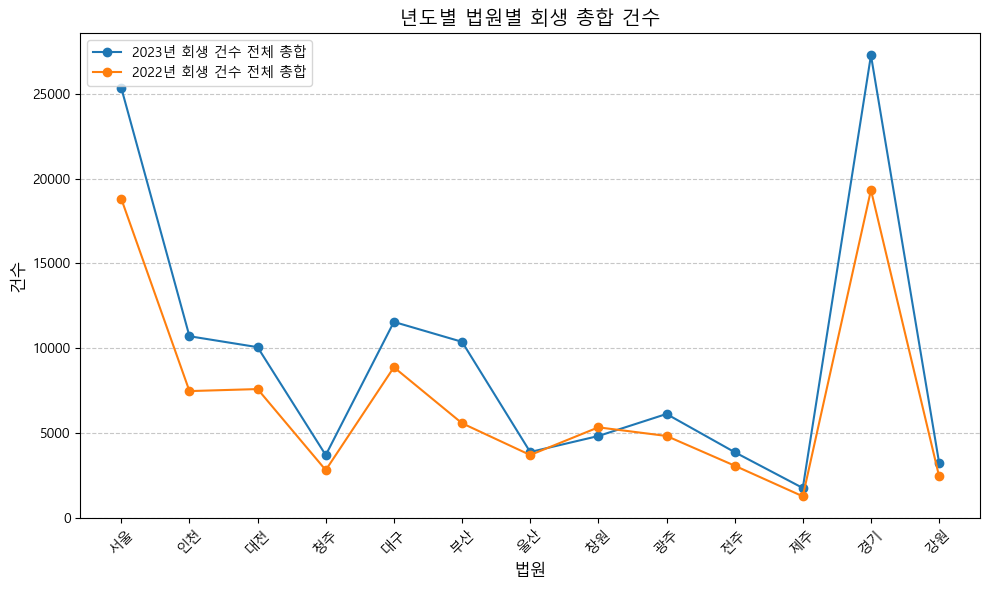

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 6))

data1 = data[data['법원'] != '합계']

plt.plot(data1['법원'], data1['2023_회생(총합)'], marker='o', label='2023년 회생 건수 전체 총합')
plt.plot(data1['법원'], data1['2022_회생(총합)'], marker='o', label='2022년 회생 건수 전체 총합')

plt.title('년도별 법원별 회생 총합 건수', fontsize=14)
plt.xlabel('법원', fontsize=12)
plt.ylabel('건수', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Display the plot
plt.tight_layout()
plt.show()

### 특정 년도 법원별 회생 건수 세부 그래프

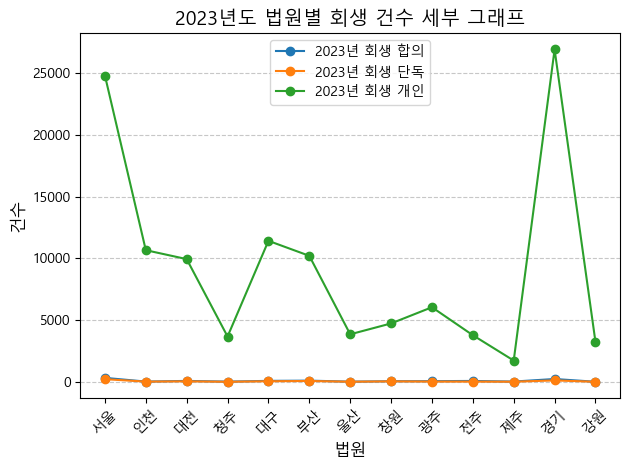

In [12]:
plt.plot(data1['법원'], data1['2023_회생(합의)'], marker='o', label='2023년 회생 합의')
plt.plot(data1['법원'], data1['2023_회생(단독)'], marker='o', label='2023년 회생 단독')
plt.plot(data1['법원'], data1['2023_회생(개인)'], marker='o', label='2023년 회생 개인')

plt.title('2023년도 법원별 회생 건수 세부 그래프', fontsize=14)
plt.xlabel('법원', fontsize=12)
plt.ylabel('건수', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

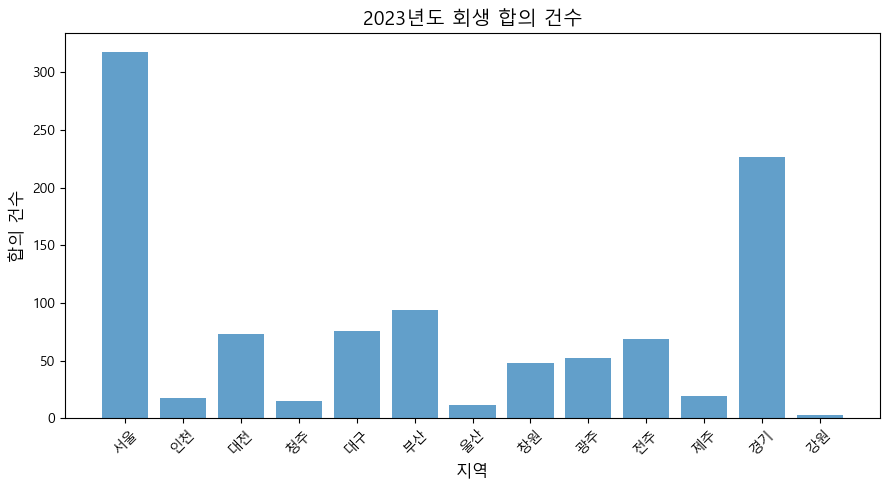

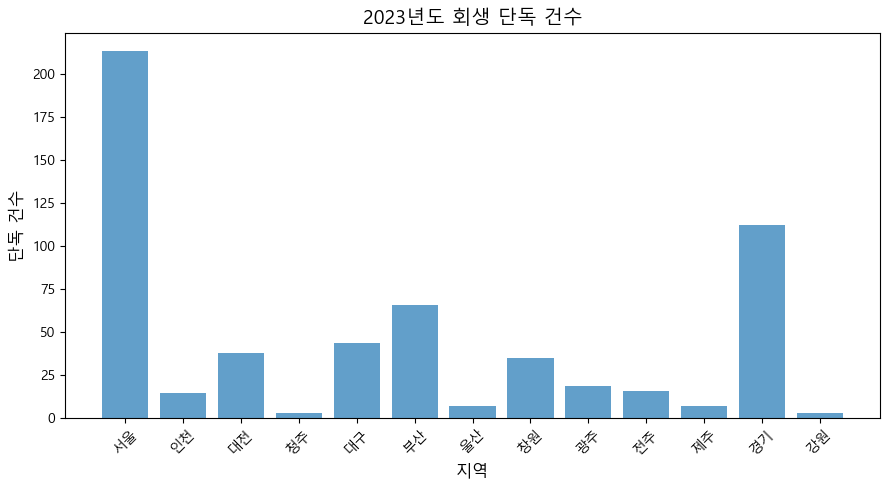

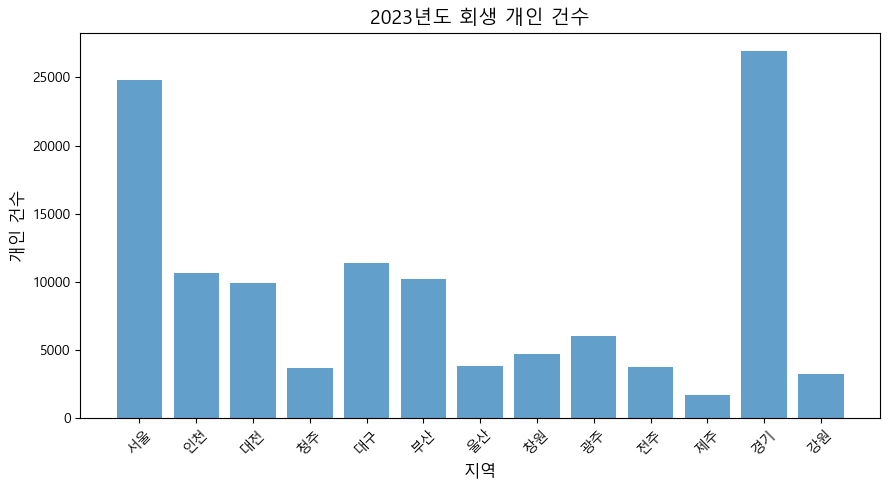

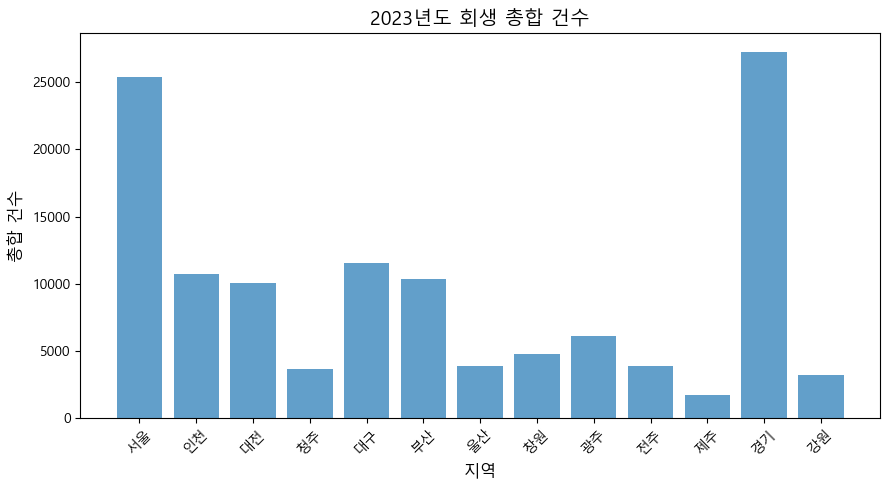

In [13]:
categories = ['2023_회생(합의)', '2023_회생(단독)', '2023_회생(개인)', '2023_회생(총합)']
titles = ['2023년도 회생 합의 건수', '2023년도 회생 단독 건수', '2023년도 회생 개인 건수', '2023년도 회생 총합 건수']
y_labels = ['합의 건수', '단독 건수', '개인 건수', '총합 건수']

# 각 카테고리에 대해 막대그래프 생성
for category, title, ylabel in zip(categories, titles, y_labels):
    plt.figure(figsize=(9, 5))
    plt.bar(data1['법원'], data1[category], alpha=0.7)
    plt.xlabel('지역', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
